In [1]:
#Get calibration curves
import pandas as pd
import numpy as np 
import pickle

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



In [2]:
lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

In [3]:
training_file = "../data/train_dset_prev5_add_predictions.pkl"
with open(training_file, 'rb') as f:
    [train_dset, final_logits] = pickle.load(f)

/home/jrouhana/.local/lib/python3.8/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [4]:
validation_file = "../data/filtered_deconvolved_final_validation_set.csv"
validation_df = pd.read_csv(validation_file)

In [5]:
validation_df

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len
0,LSTVGPRL,1,C0304,8.0,537649.0,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,-1.635385,1.839033,0.862834,NaN,NaN
1,AETTTLFQF,1,B4403,9.0,317702.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-3.080864,3.342883,0.965871,NaN,NaN
2,LPMKVRALGL,1,B0702,10.0,518233.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.684186,2.932315,0.949421,NaN,NaN
3,DIQSSGRAK,1,A0301,9.0,12400.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.406410,-3.716567,0.023740,NaN,NaN
4,TMGHHTVGLK,1,A0301,10.0,308039.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1.666246,-1.937590,0.125913,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
787639,YILPILGICNE,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.986101,-3.262673,0.036874,11.0,383.0
787640,SAPEEGEVSDS,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.538209,-3.794415,0.022001,11.0,383.0
787641,GLAIVTKYITK,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.715949,-2.995777,0.047617,11.0,383.0
787642,SKKVDFELAVQ,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.267602,-3.562536,0.027584,11.0,383.0


In [6]:
train_x = [[float(y) for y in x] for x in final_logits]
train_y = train_dset['labels']
train_x

[[-2.578428030014038, 2.8317413330078125],
 [4.11874532699585, -4.410598278045654],
 [3.8858535289764404, -4.1786017417907715],
 [3.74493145942688, -4.059162616729736],
 [3.1693429946899414, -3.4855334758758545],
 [4.303829669952393, -4.585355281829834],
 [4.280701637268066, -4.540482521057129],
 [3.790595054626465, -4.107908725738525],
 [4.313740253448486, -4.589956283569336],
 [2.6500184535980225, -2.9805479049682617],
 [3.187013864517212, -3.49409818649292],
 [4.338374137878418, -4.605052947998047],
 [4.259335041046143, -4.542634010314941],
 [3.703348159790039, -4.004234790802002],
 [4.256150722503662, -4.532087326049805],
 [2.8036983013153076, -3.1124091148376465],
 [4.187480449676514, -4.472296714782715],
 [1.8600103855133057, -2.146507740020752],
 [4.0527424812316895, -4.35922908782959],
 [3.6362433433532715, -3.9032394886016846],
 [4.231904029846191, -4.52242374420166],
 [3.4234728813171387, -3.743123769760132],
 [3.333012342453003, -3.6493639945983887],
 [2.968757152557373, -3.

In [7]:
test_x = list(zip(validation_df['logit_1'], validation_df['logit_2']))
test_y = validation_df['label'].values

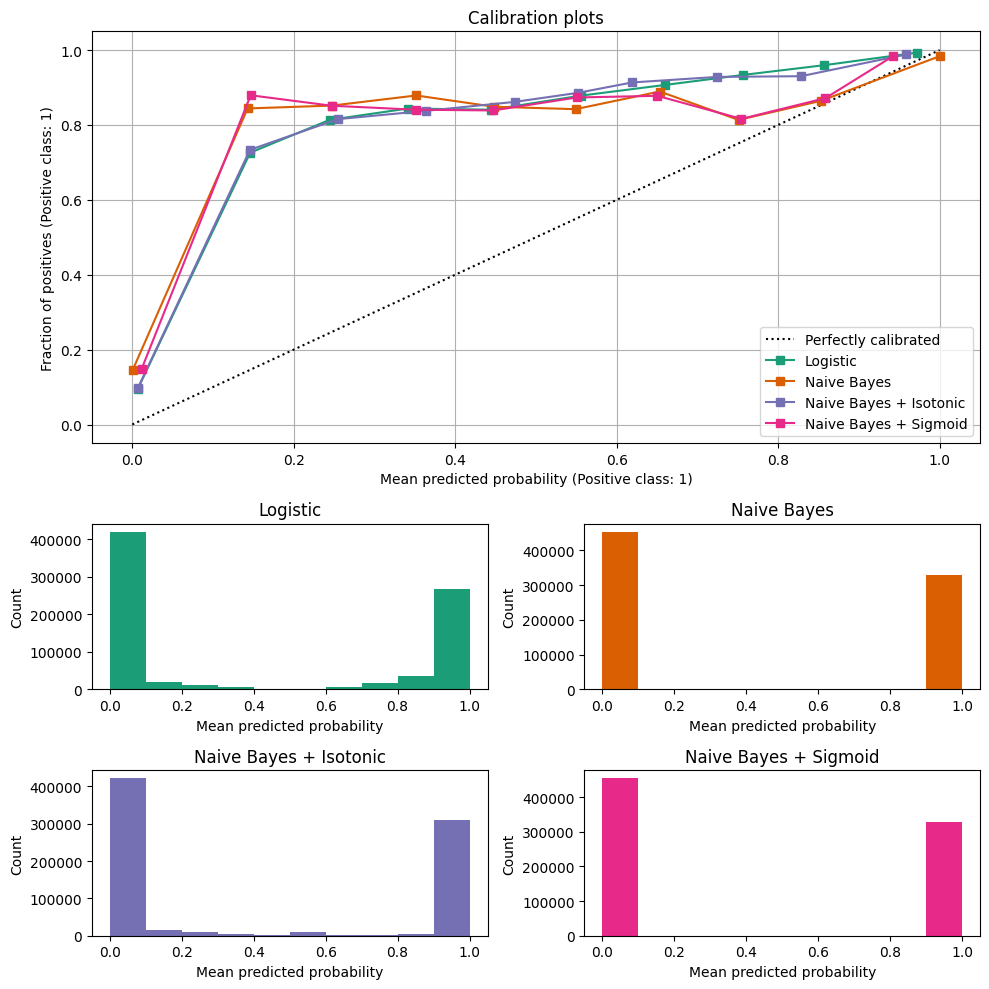

In [8]:

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        test_x,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

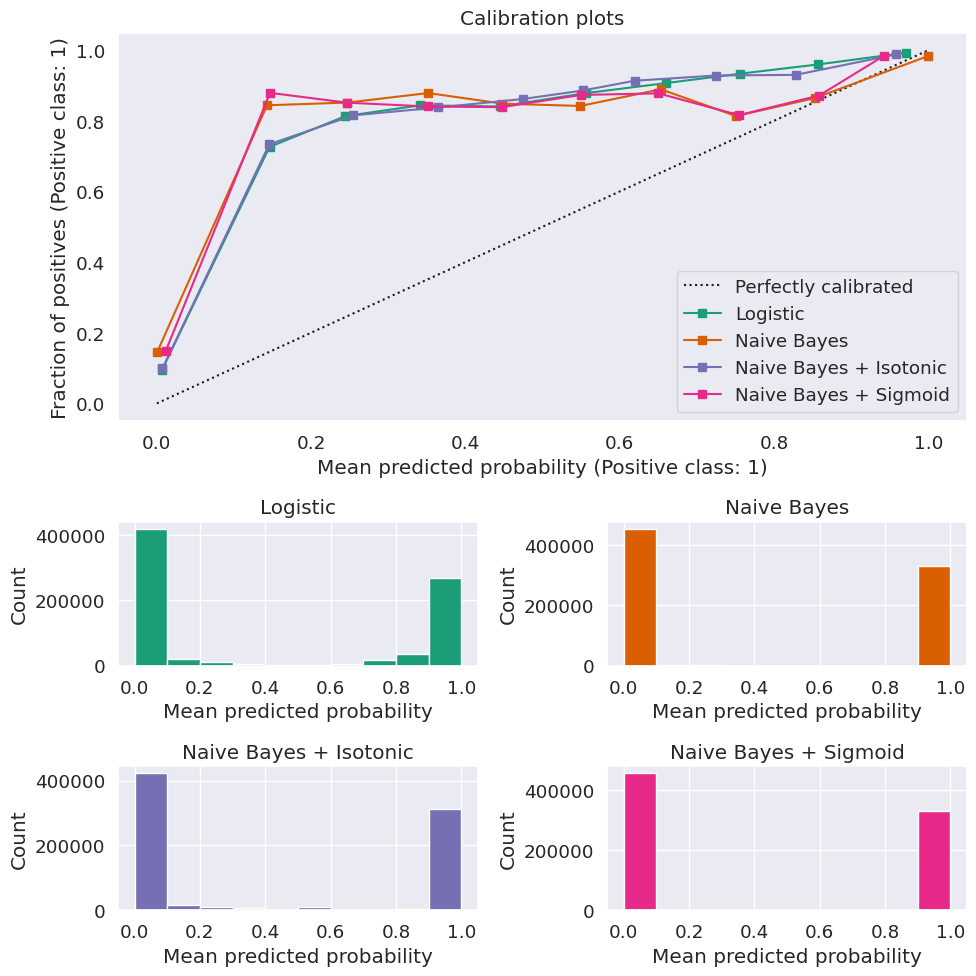

In [9]:
import seaborn as sns
sns.set(font_scale=1.2)

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        test_x,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [10]:
val_file = "../data/test_dset_prev5_add_predictions.pkl"

with open (val_file, 'rb') as f:
    val_dset, val_logits = pickle.load(f)

val_x = [[float(y) for y in x] for x in val_logits]
val_y = val_dset['labels']

/home/jrouhana/.local/lib/python3.8/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


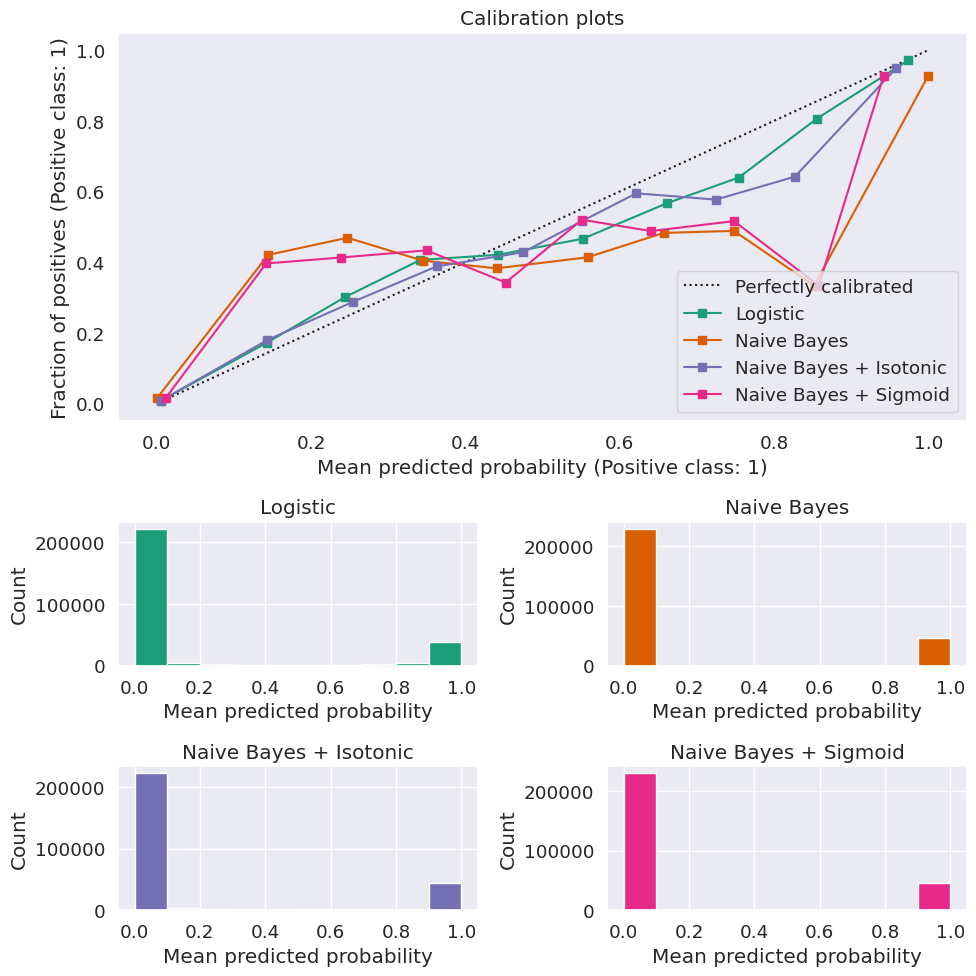

In [11]:
import seaborn as sns
sns.set(font_scale=1.2)

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        val_x,
        val_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

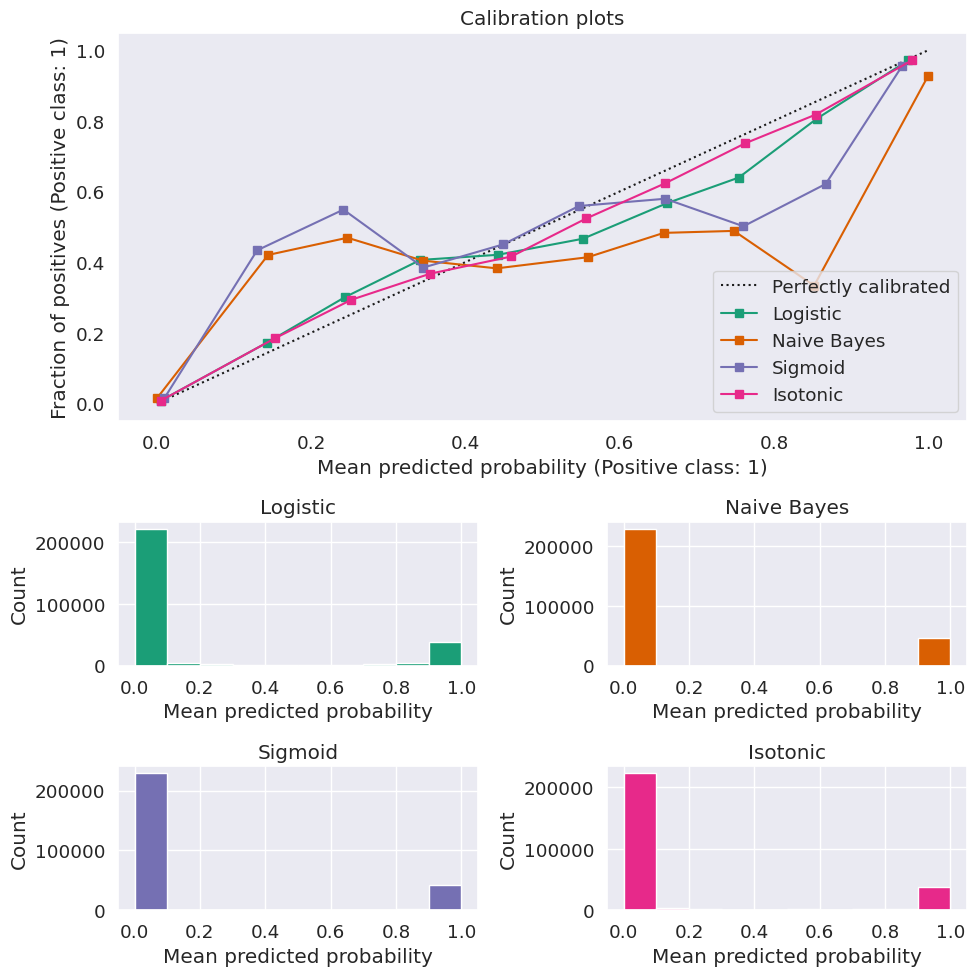

In [12]:
import seaborn as sns
sns.set(font_scale=1.2)

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()

gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")


isotonic = CalibratedClassifierCV(None, cv=2, method="isotonic")
sigmoid = CalibratedClassifierCV(None, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (sigmoid, "Sigmoid"),
    (isotonic, "Isotonic")
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        val_x,
        val_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

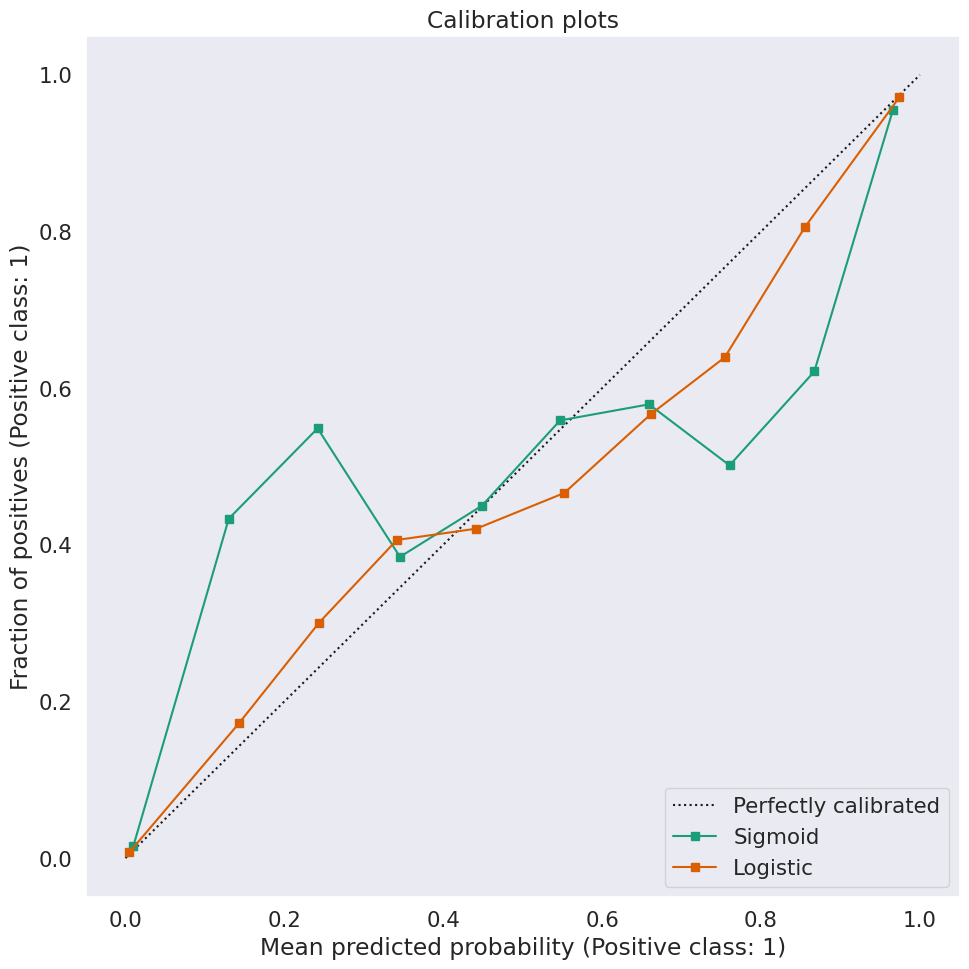

In [13]:
sns.set(font_scale=1.4)

clf_list = [
    (sigmoid, "Sigmoid"),
    (lr, "Logistic")
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_dset['labels'])
    display = CalibrationDisplay.from_estimator(
        clf,
        val_x,
        val_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    try:
        ax = fig.add_subplot(gs[row, col])

        ax.hist(
            calibration_displays[name].y_prob,
            range=(0, 1),
            bins=10,
            label=name,
            color=colors(i),
        )
        ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
    except:
        continue

plt.tight_layout()
plt.show()

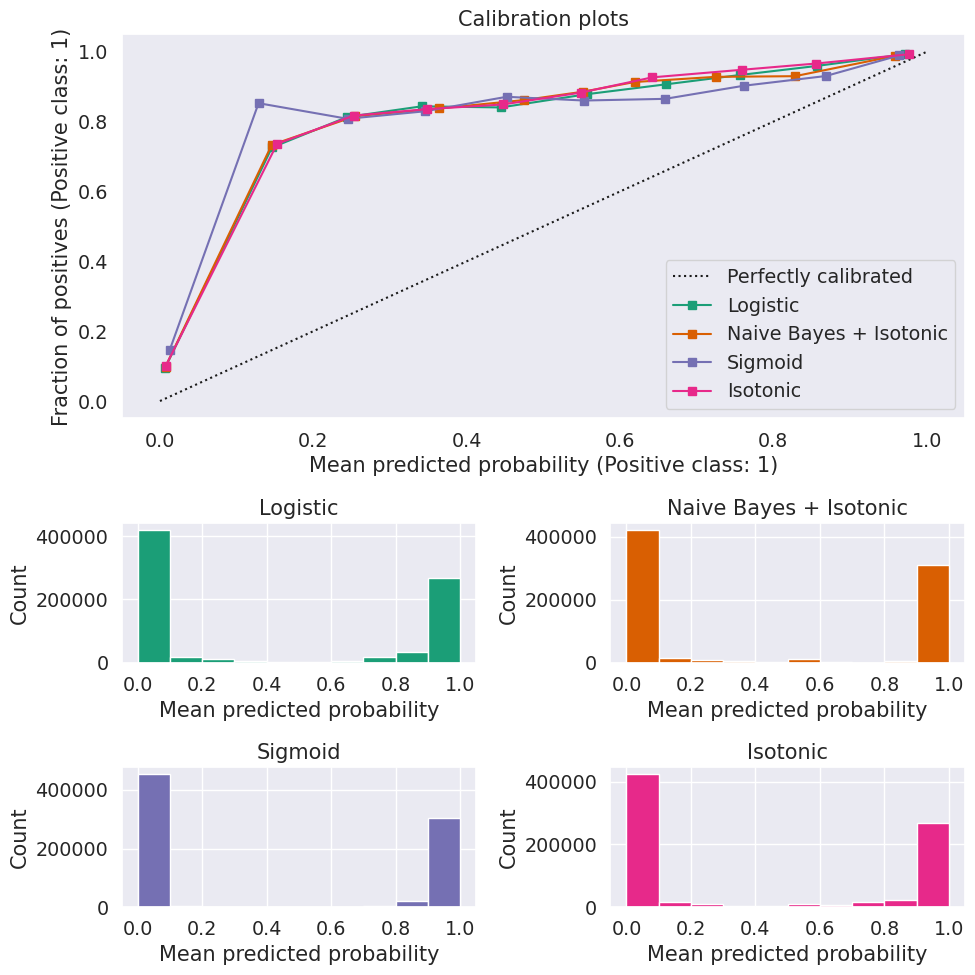

In [14]:
sns.set(font_scale=1.25)

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

regular_sigmoid = CalibratedClassifierCV(None,  method="sigmoid")
regular_isotonic = CalibratedClassifierCV(None,  method="isotonic")

clf_list = [
    (lr, "Logistic"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (regular_sigmoid, "Sigmoid"),
    (regular_isotonic, "Isotonic")
]


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        test_x,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [15]:
sub_validation = validation_df.loc[validation_df.MHC_expanded.isin(set(train_dset['allele']))].copy()

In [16]:
print(len(validation_df.loc[validation_df.final_predictions > 0.5]))
print(len(validation_df.loc[validation_df.final_predictions < 0.5]))

print(len(validation_df.loc[validation_df.final_predictions > 0.5])/(len(validation_df)))

print(len(sub_validation.loc[sub_validation.final_predictions > 0.5]))
print(len(sub_validation.loc[sub_validation.final_predictions < 0.5]))

print(len(sub_validation.loc[sub_validation.final_predictions > 0.5])/(len(sub_validation)))

328193
459451
0.41667682353956864
294440
410992
0.4173896279159437


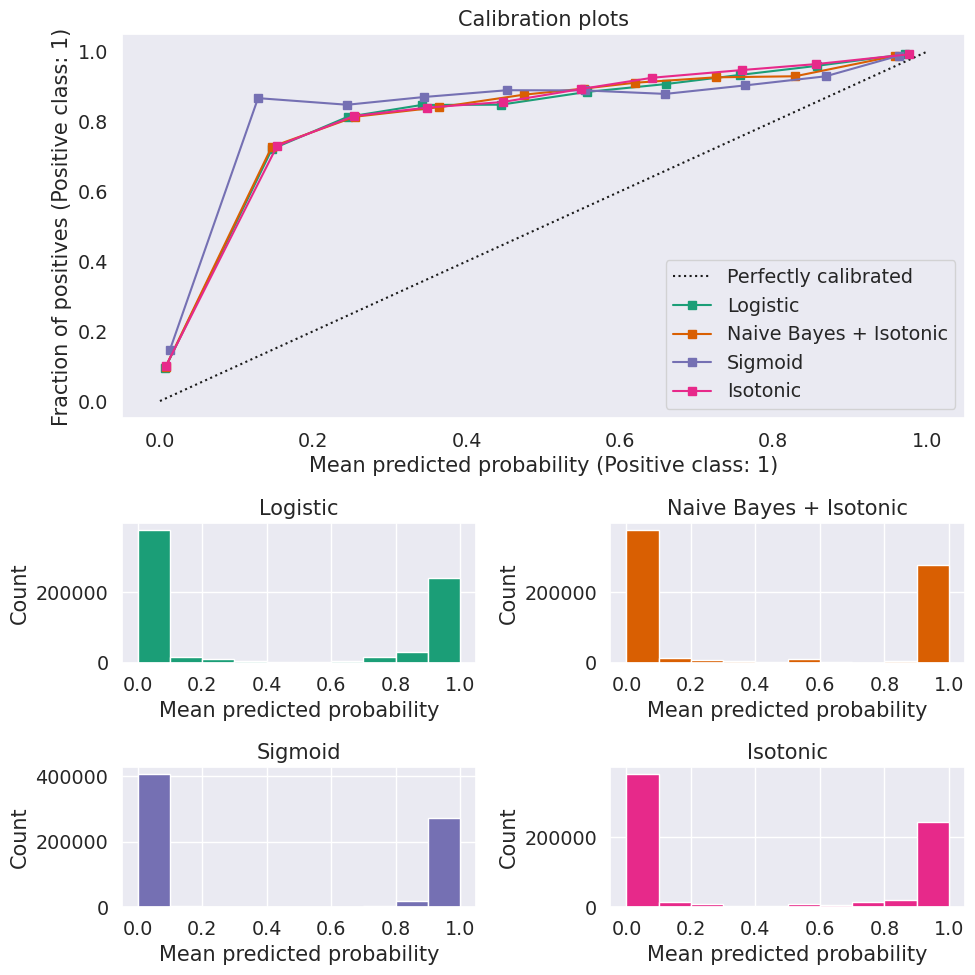

In [17]:
sns.set(font_scale=1.25)

test_x = list(zip(sub_validation['logit_1'], sub_validation['logit_2']))
test_y = sub_validation['label'].values

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

regular_sigmoid = CalibratedClassifierCV(None,  method="sigmoid")
regular_isotonic = CalibratedClassifierCV(None,  method="isotonic")

clf_list = [
    (lr, "Logistic"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (regular_sigmoid, "Sigmoid"),
    (regular_isotonic, "Isotonic")
]


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        test_x,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [18]:
len(validation_df.loc[((validation_df.final_predictions > 0.5) & (validation_df.label == 1))]) / len(validation_df.query('label == 1'))

0.820329996800585

In [19]:
len(validation_df.loc[((validation_df.final_predictions < 0.5) & (validation_df.label == 0))]) / len(validation_df.query('label == 0'))

0.9869763497214478

In [20]:
len(validation_df.loc[validation_df.label == 1])/len(validation_df)

0.5

In [21]:
test_df = validation_df.loc[((validation_df.final_predictions > 0.4) & (validation_df.final_predictions < 0.5))].copy()
len(test_df.query('label == 1'))/len(test_df)

0.8244575936883629

In [22]:
test_df = validation_df.loc[((validation_df.final_predictions > 0.5) & (validation_df.final_predictions < 1))].copy()
len(test_df.query('label == 0'))/len(test_df)

0.01562799937841453

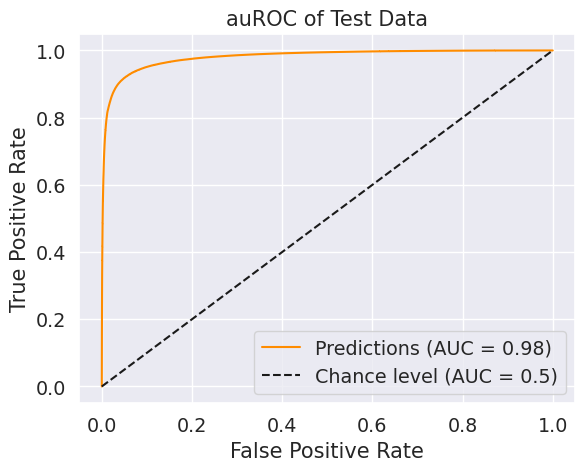

In [23]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

test_x = list(zip(validation_df['logit_1'], validation_df['logit_2']))
test_y = validation_df['label'].values

display = RocCurveDisplay.from_predictions(
    validation_df['label'],
    validation_df['final_predictions'],
    name="Predictions",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="auROC of Test Data",
)

Logistic: f1=0.898 auc=0.982


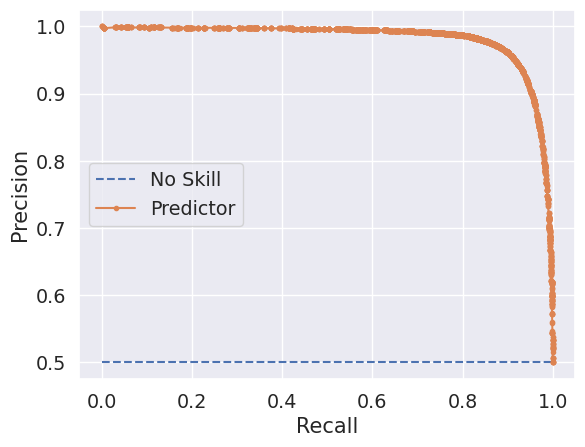

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

test_yhat = regular_isotonic.predict(test_x)
test_yhat_prob = [x[1] for x in regular_isotonic.predict_proba(test_x)]


lr_precision, lr_recall, _ = precision_recall_curve(validation_df['label'], test_yhat_prob)
lr_f1, lr_auc = f1_score(validation_df['label'], test_yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len([x for x in validation_df['label'] if x ==1]) / len(validation_df['label'])
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Predictor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [25]:
new_MHCs = validation_df.loc[~(validation_df['MHC_expanded'].isin(set(train_dset['allele'])))].copy()
new_MHCs


,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len
5,VEKAPQETY,1,B1511,9.0,55738.0,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,1.397099,-1.654740,0.160469,NaN,NaN
9,LPDEIYHVY,1,B1511,9.0,256434.0,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-1.552696,1.738904,0.850548,NaN,NaN
14,QPLQESTSATL,1,B6701,11.0,211617.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,1.278225,-1.547386,0.175464,NaN,NaN
15,AHCGAGDEL,1,B3901,9.0,354555.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.455605,2.712080,0.937736,NaN,NaN
24,GRLQQVLTGL,1,B2707,10.0,79680.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFHTSVSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFHTSVSRPGRGEPRF...,-2.852410,3.105193,0.957106,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
787292,YREMLHNAT,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,4.394435,-4.651414,0.009458,9.0,375.0
787293,VIPKKKTWD,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,3.958503,-4.268003,0.013816,9.0,375.0
787294,LFMFTRRVNE,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,4.347547,-4.611484,0.009839,10.0,376.0
787295,GYIVSTSCKHI,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,3.164499,-3.513767,0.028923,11.0,377.0


Logistic: f1=0.892 auc=0.980


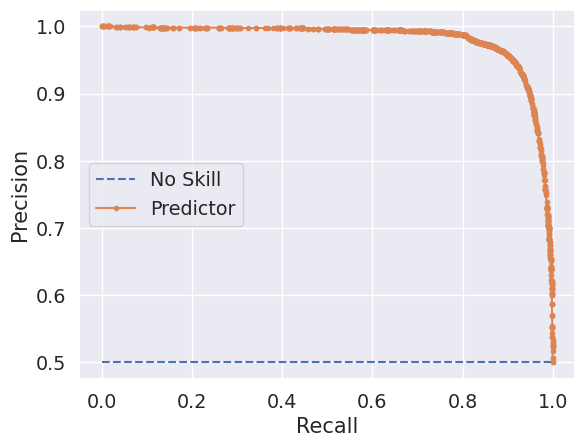

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

val_x = list(zip(new_MHCs['logit_1'], new_MHCs['logit_2']))
val_y = new_MHCs['label'].values

val_yhat = regular_isotonic.predict(val_x)
val_yhat_prob = [x[1] for x in regular_isotonic.predict_proba(val_x)]


lr_precision, lr_recall, _ = precision_recall_curve(new_MHCs['label'], val_yhat_prob)
lr_f1, lr_auc = f1_score(new_MHCs['label'], val_yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len([x for x in new_MHCs['label'] if x ==1]) / len(new_MHCs['label'])
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Predictor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [27]:
def get_PRC(df):
    val_x = list(zip(df['logit_1'], df['logit_2']))
    val_y = df['label'].values

    val_yhat = regular_isotonic.predict(val_x)
    val_yhat_prob = [x[1] for x in regular_isotonic.predict_proba(val_x)]


    lr_precision, lr_recall, _ = precision_recall_curve(df['label'], val_yhat_prob)
    lr_f1, lr_auc = f1_score(df['label'], val_yhat), auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len([x for x in df['label'] if x ==1]) / len(df['label'])
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Predictor')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Logistic: f1=0.892 auc=0.980


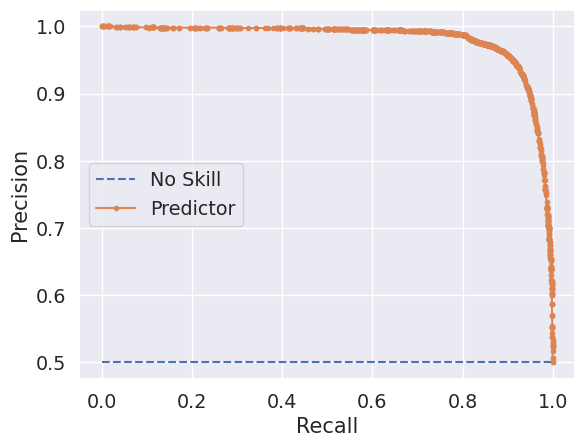

In [28]:
copy_df = new_MHCs.copy()
get_PRC(copy_df)

In [29]:
copy_df.groupby('MHC_expanded').count()['epitope']

MHC_expanded
A0103      14
A0214      18
A0220    1904
A0302    2222
A2406     712
         ... 
C0706      16
C0803     474
C1204       6
C1505     674
C1604      14
Name: epitope, Length: 68, dtype: int64

Logistic: f1=0.679 auc=0.917


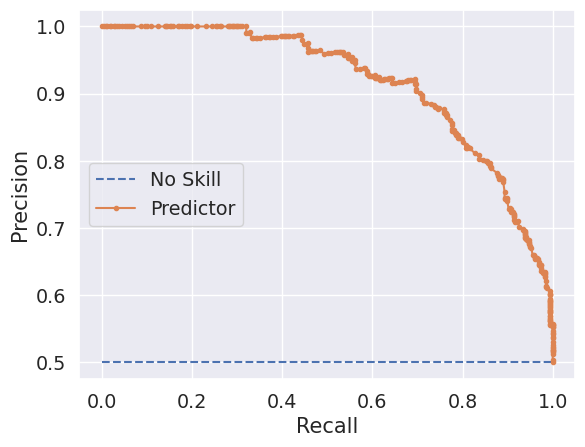

In [30]:
get_PRC(copy_df.loc[copy_df['MHC_expanded'] == 'C1505'].copy())

In [31]:
final_logits

[tensor([-2.5784,  2.8317]),
 tensor([ 4.1187, -4.4106]),
 tensor([ 3.8859, -4.1786]),
 tensor([ 3.7449, -4.0592]),
 tensor([ 3.1693, -3.4855]),
 tensor([ 4.3038, -4.5854]),
 tensor([ 4.2807, -4.5405]),
 tensor([ 3.7906, -4.1079]),
 tensor([ 4.3137, -4.5900]),
 tensor([ 2.6500, -2.9805]),
 tensor([ 3.1870, -3.4941]),
 tensor([ 4.3384, -4.6051]),
 tensor([ 4.2593, -4.5426]),
 tensor([ 3.7033, -4.0042]),
 tensor([ 4.2562, -4.5321]),
 tensor([ 2.8037, -3.1124]),
 tensor([ 4.1875, -4.4723]),
 tensor([ 1.8600, -2.1465]),
 tensor([ 4.0527, -4.3592]),
 tensor([ 3.6362, -3.9032]),
 tensor([ 4.2319, -4.5224]),
 tensor([ 3.4235, -3.7431]),
 tensor([ 3.3330, -3.6494]),
 tensor([ 2.9688, -3.2922]),
 tensor([ 4.2701, -4.5585]),
 tensor([ 3.6912, -4.0213]),
 tensor([ 4.3138, -4.5965]),
 tensor([ 3.5940, -3.8981]),
 tensor([ 3.8135, -4.1131]),
 tensor([ 3.9401, -4.2541]),
 tensor([ 3.9391, -4.2504]),
 tensor([ 4.0589, -4.3499]),
 tensor([ 4.1776, -4.4686]),
 tensor([ 4.2597, -4.5366]),
 tensor([ 4.14

In [32]:
train_dset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'allele', 'peptide_length'],
    num_rows: 829159
})

In [33]:
with open("../data/training_samples_5prev.pkl", 'rb') as f:
    temp = pickle.load(f)

In [34]:
training = temp.query('training == 1').copy()
training['logit_1'] = [x[0].numpy() for x in final_logits]
training['logit_2'] = [x[1].numpy() for x in final_logits]
training



,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.8317413
2,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.1187453,-4.4105983
3,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.8858535,-4.1786017
4,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.7449315,-4.0591626
5,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.4855335
...,...,...,...,...,...,...,...,...,...,...
1105089,C1701,9,VPCSYSGCE,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.146653,-4.393153
1105090,C1701,9,GMKSIDTFF,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.3606856,-3.6401904
1105094,C1701,9,HPTDPTVLI,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.563497,-3.8707366
1105095,C1701,9,KKKVVFCPV,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.094226,-4.352866


In [35]:
train_x = list(zip(training['logit_1'], training['logit_2']))
training['isotonic'] = [x[1] for x in regular_isotonic.predict_proba(train_x)]
training

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.8317413,0.974387
2,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.1187453,-4.4105983,0.000687
3,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.8858535,-4.1786017,0.002166
4,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.7449315,-4.0591626,0.002585
5,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.4855335,0.011797
...,...,...,...,...,...,...,...,...,...,...,...
1105089,C1701,9,VPCSYSGCE,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.146653,-4.393153,0.001750
1105090,C1701,9,GMKSIDTFF,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.3606856,-3.6401904,0.010632
1105094,C1701,9,HPTDPTVLI,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.563497,-3.8707366,0.004285
1105095,C1701,9,KKKVVFCPV,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.094226,-4.352866,0.001843


In [36]:
training.to_csv('../data/final_training_set.csv', index=False)

In [37]:
test_x

[(-1.6353853940963743, 1.839032769203186),
 (-3.08086371421814, 3.3428826332092285),
 (-2.68418550491333, 2.93231463432312),
 (3.406409502029419, -3.716566801071167),
 (1.6662460565567017, -1.9375896453857424),
 (1.3970987796783447, -1.6547404527664185),
 (-2.603205919265747, 2.851196765899658),
 (-3.27859878540039, 3.543332099914551),
 (-2.821756362915039, 3.0803534984588623),
 (-1.552695870399475, 1.7389039993286133),
 (-3.089926481246948, 3.346512079238892),
 (-2.772205114364624, 3.012501716613769),
 (-2.649893045425415, 2.89414119720459),
 (-2.560793161392212, 2.7983932495117188),
 (1.278225302696228, -1.5473864078521729),
 (-2.455604791641236, 2.712080240249634),
 (-1.8431469202041624, 2.063634157180786),
 (-2.438565731048584, 2.668264150619507),
 (-2.996598482131958, 3.254002094268799),
 (-3.127493143081665, 3.39947772026062),
 (-2.7035820484161377, 2.947786808013916),
 (-2.2155098915100098, 2.464643955230713),
 (-2.094784736633301, 2.322483539581299),
 (-1.7145615816116333, 1.92

In [38]:
import random

validation_df ['sub_sample'] = 2
validation_df['sub_sample'] = validation_df['sub_sample'].apply(lambda x: x - random.choices([0, 1], weights=(16.666, 83.334))[0])
validation_df.loc[validation_df.label == 0, 'sub_sample'] = 2

sampled_validation = validation_df.loc[validation_df.sub_sample == 2].copy()

#print(len(validation_df.loc[((validation_df['sub_sample'] == 2 ) & (validation_df['label'] == 1))]))
#print(len(validation_df.loc[((validation_df['sub_sample'] == 2 ) & (validation_df['label'] == 0))]))

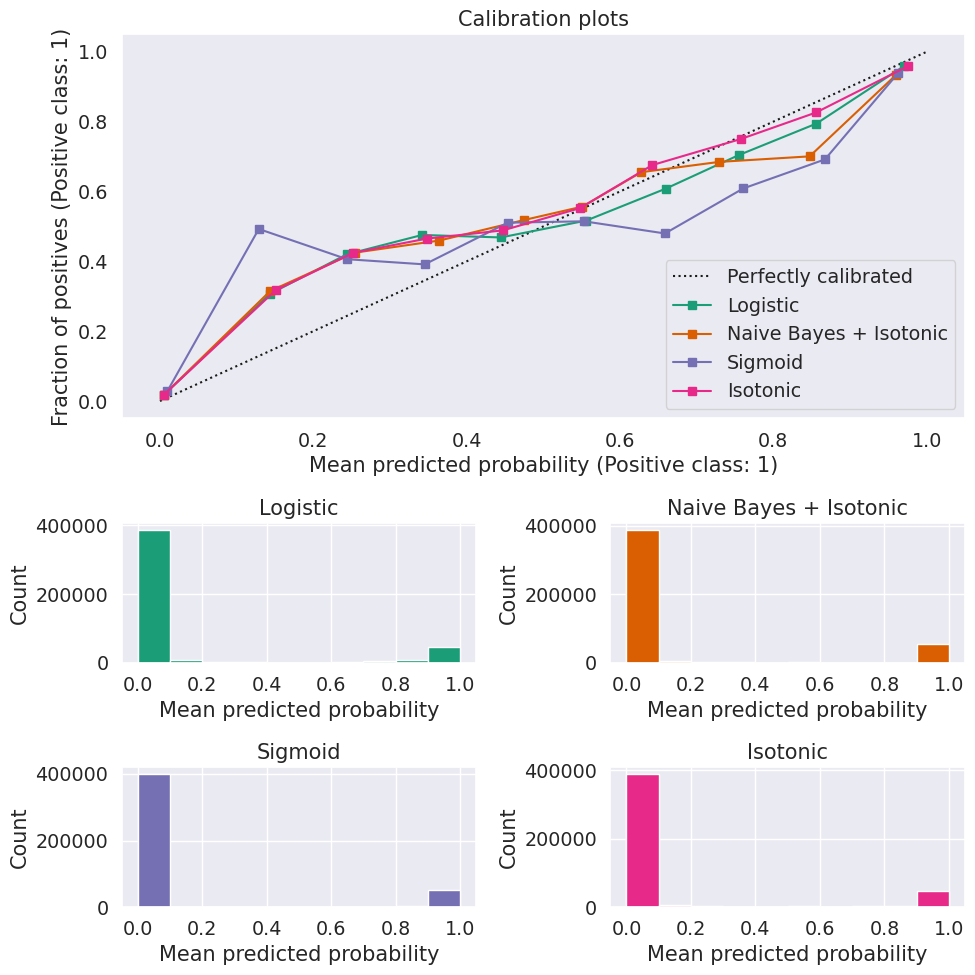

In [39]:
test_x = list(zip(sampled_validation['logit_1'], sampled_validation['logit_2']))
test_y = sampled_validation['label'].values

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

regular_sigmoid = CalibratedClassifierCV(None,  method="sigmoid")
regular_isotonic = CalibratedClassifierCV(None,  method="isotonic")

clf_list = [
    (lr, "Logistic"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (regular_sigmoid, "Sigmoid"),
    (regular_isotonic, "Isotonic")
]


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

#train_logits = np.array([x for x in final_logits]).reshape(-1, 1)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(train_x, train_y)
    display = CalibrationDisplay.from_estimator(
        clf,
        test_x,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [40]:
validation_df['predicted_label'] = isotonic.predict(list(zip(validation_df['logit_1'].to_list(), validation_df['logit_2'].to_list())))


In [41]:
(sum(validation_df['label'] == validation_df['predicted_label']))/len(validation_df)

0.9060743178390237

In [42]:
val_pos = validation_df.loc[validation_df.label == 1].copy()
(sum(val_pos['label'] == val_pos['predicted_label']))/len(val_pos)

0.8263200125945224

In [43]:
val_neg = validation_df.loc[validation_df.label == 0].copy()

(sum(val_neg['label'] == val_neg['predicted_label']))/len(val_neg)

0.985828623083525

In [45]:
for val in val_pos.peptide_length.drop_duplicates().tolist():
    my_df = val_pos.loc[val_pos.peptide_length == val].copy()
    print(val, (sum(my_df['label'] == my_df['predicted_label'])) / len(my_df))

8.0 0.7895957587806495
9.0 0.8529283892626474
10.0 0.83347036702565
11.0 0.8104027204482751
13.0 0.6380171184022825
12.0 0.7136915978946
14.0 0.4898255813953488
15.0 0.4090909090909091


In [53]:
val_neg['peptide_length'] = val_neg.epitope.apply(lambda x: len(x))
for val in val_neg.peptide_length.drop_duplicates().tolist():
    my_df = val_neg.loc[val_neg.peptide_length == val].copy()
    try:
        print(val, (sum(my_df['label'] == my_df['predicted_label'])) / len(my_df))
    except:
        continue

8 0.979314588658525
9 0.9861861242710962
10 0.9876130527961613
11 0.9863763714524029
12 0.9857690558190916
13 0.9805040418449834
14 0.9750830564784053
15 0.8636363636363636


In [51]:
val_neg

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len,sub_sample,predicted_label
393822,NLVRVLQG,0,A0101,NaN,NaN,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,4.031012,-4.329536,0.013002,8.0,373.0,2,0
393823,IVNRINTL,0,A0101,NaN,NaN,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,2.892072,-3.205064,0.038976,8.0,373.0,2,0
393824,GLSDPAHV,0,A0101,NaN,NaN,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.687882,-3.991379,0.018139,8.0,373.0,2,0
393825,RDPNSAVV,0,A0101,NaN,NaN,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.595711,-3.909876,0.019649,8.0,373.0,2,0
393826,YASKLGDD,0,A0101,NaN,NaN,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.144347,-3.444357,0.030938,8.0,373.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787639,YILPILGICNE,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.986101,-3.262673,0.036874,11.0,383.0,2,0
787640,SAPEEGEVSDS,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.538209,-3.794415,0.022001,11.0,383.0,2,0
787641,GLAIVTKYITK,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.715949,-2.995777,0.047617,11.0,383.0,2,0
787642,SKKVDFELAVQ,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.267602,-3.562536,0.027584,11.0,383.0,2,0
